2018-03-27 10:41:24,515 root         INFO     Load data from SQL.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
                      open  tw_sentiment  reddit_sentiment  google_sentiment  \
open              1.000000      0.098443          0.154861          0.606869   
tw_sentiment      0.098443      1.000000         -0.055681         -0.030822   
reddit_sentiment  0.154861     -0.055681          1.000000         -0.067889   
google_sentiment  0.606869     -0.030822         -0.067889          1.000000   
close             0.995334      0.098057          0.160134          0.605147   
up               -0.017799      0.011366          0.020183         -0.010824   

                     close        up  
open              0.995334 -0.017799  
tw_sentiment      0.098057  0.011366  
reddit_sentiment  0.160134  0.020183  
google_sentiment  0.605147 -0.010824  
close             1.000000  0.046851  
up                0.046851  1.000000  


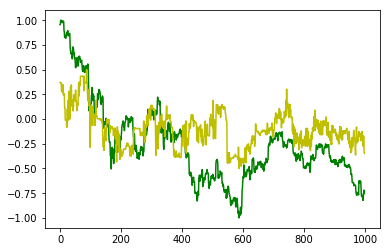

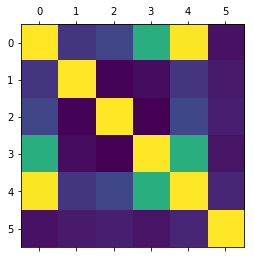

In [37]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data_from_pas
from sklearn.preprocessing import MinMaxScaler

df = get_all_data_from_pas(pas=30)
sc = MinMaxScaler(feature_range=(-1, 1))
opened = sc.fit_transform(df['open'].values.reshape(-1, 1))
sc = MinMaxScaler(feature_range=(-.5, .5))
#reddit_sentimented = sc.fit_transform(df['reddit_sentiment'].values.reshape(-1, 1))
google_sentimented = sc.fit_transform(df['google_sentiment'].values.reshape(-1, 1))
plt.plot(opened, 'g')
#plt.plot(df['tw_sentiment'], 'r')
#plt.plot(reddit_sentimented, 'b')
plt.plot(google_sentimented, 'y')
plt.matshow(df.corr(),interpolation='nearest')
print(df.corr())

In [ ]:
plt.plot(history.history['mean_absolute_error'], 'r'),
plt.plot(history.history['mean_squared_error'], 'g')

In [ ]:
plt.plot(df['real'], 'g')
plt.plot(df['predicted'], 'r')
plt.plot(df['predicted_regul'], 'b')

In [ ]:
df.describe()

In [ ]:
regul

In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dropout, Dense
seed = 7
numpy.random.seed(seed)


# load pima indians dataset
# dataset = numpy.loadtxt(path, delimiter=",")
dataset = numpy.random.rand(800, 9)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,  7]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, nb_epoch=10, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


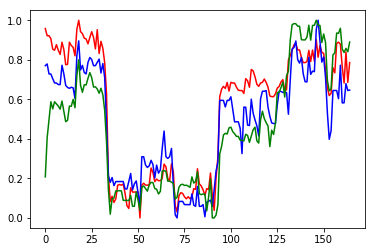

In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.gdax_client import GdaxClient
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

gc = GdaxClient()
rates_btc = gc.get_product_historic_rates(product_id='BTC-EUR', granularity=300)
df_btc = pd.DataFrame(data=rates_btc)
rates_ether = gc.get_product_historic_rates(product_id='ETH-EUR', granularity=300)
df_ether = pd.DataFrame(data=rates_ether)
rates_ltc = gc.get_product_historic_rates(product_id='LTC-EUR', granularity=300)
df_ltc = pd.DataFrame(data=rates_ltc)
rates_bch = gc.get_product_historic_rates(product_id='BCH-EUR', granularity=300)
df_bch = pd.DataFrame(data=rates_bch)



sc = MinMaxScaler(feature_range=(0, 1))
bch = sc.fit_transform(df_bch[1].values.reshape(-1, 1))
ether = sc.fit_transform(df_ether[-df_bch[1].count():][1].values.reshape(-1, 1))
btc = sc.fit_transform(df_btc[-df_bch[1].count():][1].values.reshape(-1, 1))
ltc = sc.fit_transform(df_ltc[-df_bch[1].count():][1].values.reshape(-1, 1))

plt.plot(btc, 'r')
plt.plot(ether, 'b')
plt.plot(ltc, 'g')
#plt.plot(bch, 'y')